In [1]:
# encoding=utf8

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carga de datos, indicando el tipo de dato se redujo de 71.3 Mb a 13.2 Mb
data_values = pd.read_csv('train_values.csv',dtype = {
    "geo_level_1_id" : "int16", 
    "geo_level_2_id" : "int16",
    "geo_level_3_id" : "int16",
    "count_floors_pre_eq" : "int8",
    "age" : "int16",
    "area_percentage" :"int16",
    "height_percentage" :"int16",
    "land_surface_condition" :"category",
    "foundation_type" :"category",
    "roof_type" :"category",
    "ground_floor_type" :"category",
    "other_floor_type" :"category",
    "position" :"category",
    "plan_configuration" :"category",
    "has_superstructure_adobe_mud" : "bool",
    "has_superstructure_mud_mortar_stone" : "bool",
    "has_superstructure_stone_flag" : "bool",
    "has_superstructure_cement_mortar_stone" : "bool",
    "has_superstructure_mud_mortar_brick" : "bool",
    "has_superstructure_cement_mortar_brick" : "bool",
    "has_superstructure_timber" : "bool",
    "has_superstructure_bamboo" : "bool",
    "has_superstructure_rc_non_engineered" : "bool",
    "has_superstructure_rc_engineered" : "bool",
    "has_superstructure_other" : "bool",
    "legal_ownership_status" :"category",
    "count_families" : "int16",
    "has_secondary_use" : "bool",
    "has_secondary_use_agriculture" : "bool",
    "has_secondary_use_hotel" : "bool",
    "has_secondary_use_rental" : "bool",
    "has_secondary_use_institution" : "bool",
    "has_secondary_use_school" : "bool",
    "has_secondary_use_industry" : "bool",
    "has_secondary_use_health_post" : "bool",
    "has_secondary_use_gov_office" : "bool",
    "has_secondary_use_use_police" : "bool",
    "has_secondary_use_other" : "bool"
                    
})

data_labels = pd.read_csv('train_labels.csv',dtype = {
    "damage_grade" : "category"    
})

In [3]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int16   
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int16   
 7   height_percentage                       260601 non-null  int16   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [4]:
data_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   building_id   260601 non-null  int64   
 1   damage_grade  260601 non-null  category
dtypes: category(1), int64(1)
memory usage: 2.2 MB


In [5]:
data_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
cantidad_edificios = data_labels["building_id"].count()
cantidad_edificios

260601

In [12]:
damage = data_labels.groupby(["damage_grade"]).count()
damage

,building_id
damage_grade,
1,25124
2,148259
3,87218


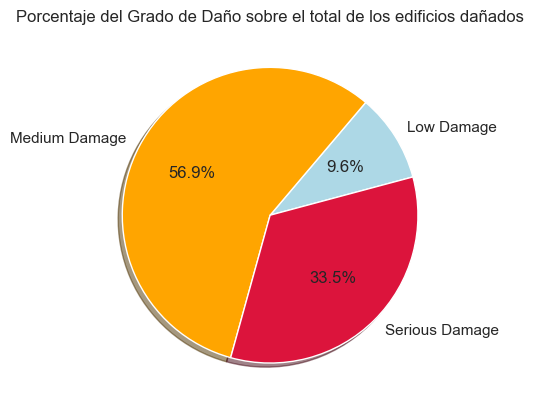

In [46]:
#Definir colores
my_colors = my_colors = ['lightblue','orange','crimson']

plt.pie(damage["building_id"].to_list(),
        labels = ["Low Damage" ,"Medium Damage","Serious Damage"],
        autopct='%1.1f%%',
        startangle=15,           
        shadow = True,
        colors = my_colors
)
plt.title("Porcentaje del Grado de Daño sobre el total de los edificios dañados")
plt.show()